In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [5]:
df = pd.read_csv("aluminum_wire_rod_synthetic.csv")

print(df.head())

   Casting_Temperature_C  Rolling_Speed_m_min  Cooling_Rate_C_s     UTS_MPa  \
0             697.718136           163.643838         39.712249  500.711414   
1             714.057005           142.242639         34.400726  511.514986   
2             716.629472           131.062094         38.224224  515.505950   
3             692.591177           146.584556         29.936551  505.424829   
4             706.830214           129.944941         31.104307  515.491479   

   Elongation_%  Conductivity_%_IACS  
0     78.081272            54.282260  
1     79.159096            54.244548  
2     79.558297            54.199773  
3     76.581255            54.635314  
4     78.649964            54.109156  


In [6]:
# Check for missing values
print(df.isnull().sum())

Casting_Temperature_C    0
Rolling_Speed_m_min      0
Cooling_Rate_C_s         0
UTS_MPa                  0
Elongation_%             0
Conductivity_%_IACS      0
dtype: int64


In [7]:
# Get statistical summary
print(df.describe())


       Casting_Temperature_C  Rolling_Speed_m_min  Cooling_Rate_C_s  \
count           10000.000000         10000.000000      10000.000000   
mean              714.771513           150.230753         32.501840   
std                14.361105            17.339264          4.310463   
min               690.000582           120.009465         25.000722   
25%               702.367430           135.273602         28.788982   
50%               714.648492           150.276050         32.536330   
75%               727.081496           165.322198         36.199823   
max               739.977885           179.995490         39.998515   

            UTS_MPa  Elongation_%  Conductivity_%_IACS  
count  10000.000000  10000.000000         10000.000000  
mean     512.285332     79.853869            54.147138  
std       10.275373      1.757382             0.536160  
min      479.358287     73.820515            52.221457  
25%      505.102034     78.563676            53.790899  
50%      512.19792

In [8]:
# Correlation matrix
correlation_matrix = df.corr()

# Display correlation
print(correlation_matrix)


                       Casting_Temperature_C  Rolling_Speed_m_min  \
Casting_Temperature_C               1.000000            -0.012781   
Rolling_Speed_m_min                -0.012781             1.000000   
Cooling_Rate_C_s                   -0.007655            -0.018316   
UTS_MPa                             0.708904            -0.516436   
Elongation_%                        0.815638             0.002123   
Conductivity_%_IACS                 0.003993            -0.315252   

                       Cooling_Rate_C_s   UTS_MPa  Elongation_%  \
Casting_Temperature_C         -0.007655  0.708904      0.815638   
Rolling_Speed_m_min           -0.018316 -0.516436      0.002123   
Cooling_Rate_C_s               1.000000  0.008965     -0.125775   
UTS_MPa                        0.008965  1.000000      0.574342   
Elongation_%                  -0.125775  0.574342      1.000000   
Conductivity_%_IACS            0.178201  0.163177     -0.018288   

                       Conductivity_%_IACS  
C

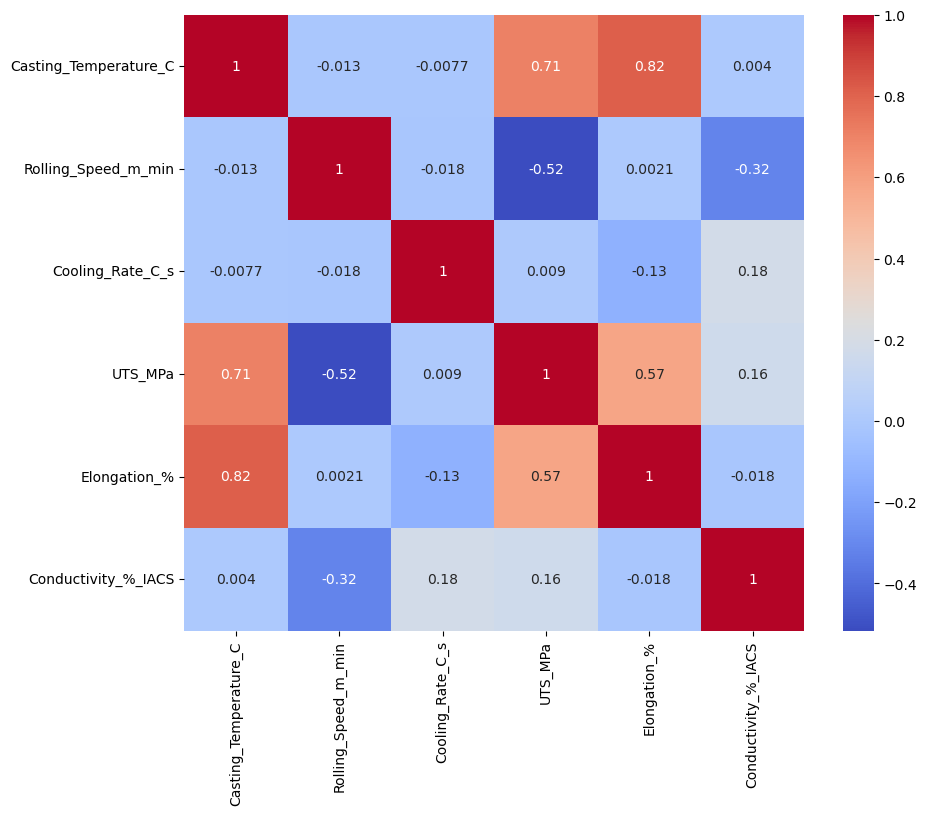

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


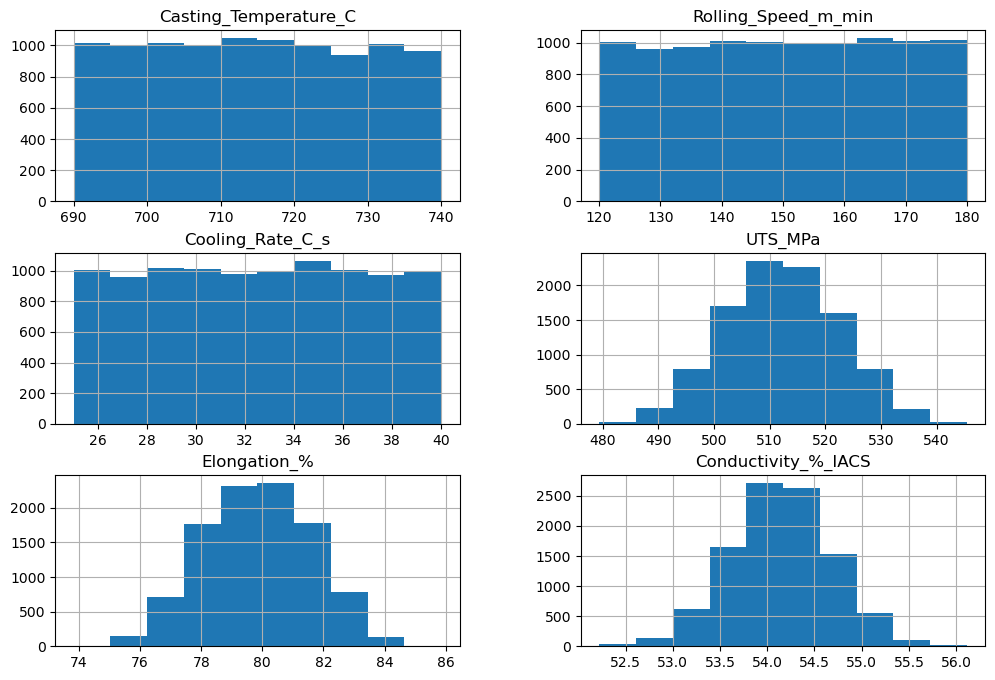

In [10]:
# Histograms of all features
df.hist(figsize=(12, 8))
plt.show()

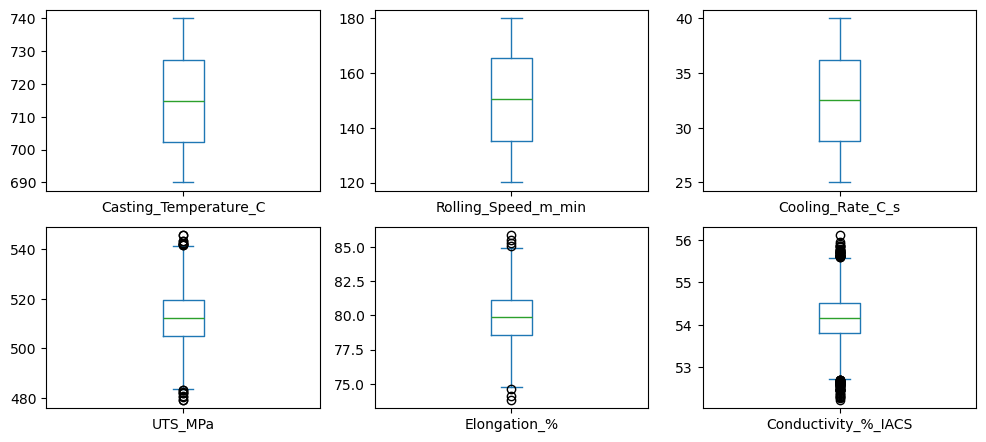

In [11]:
# Boxplot for each feature
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8))
plt.show()


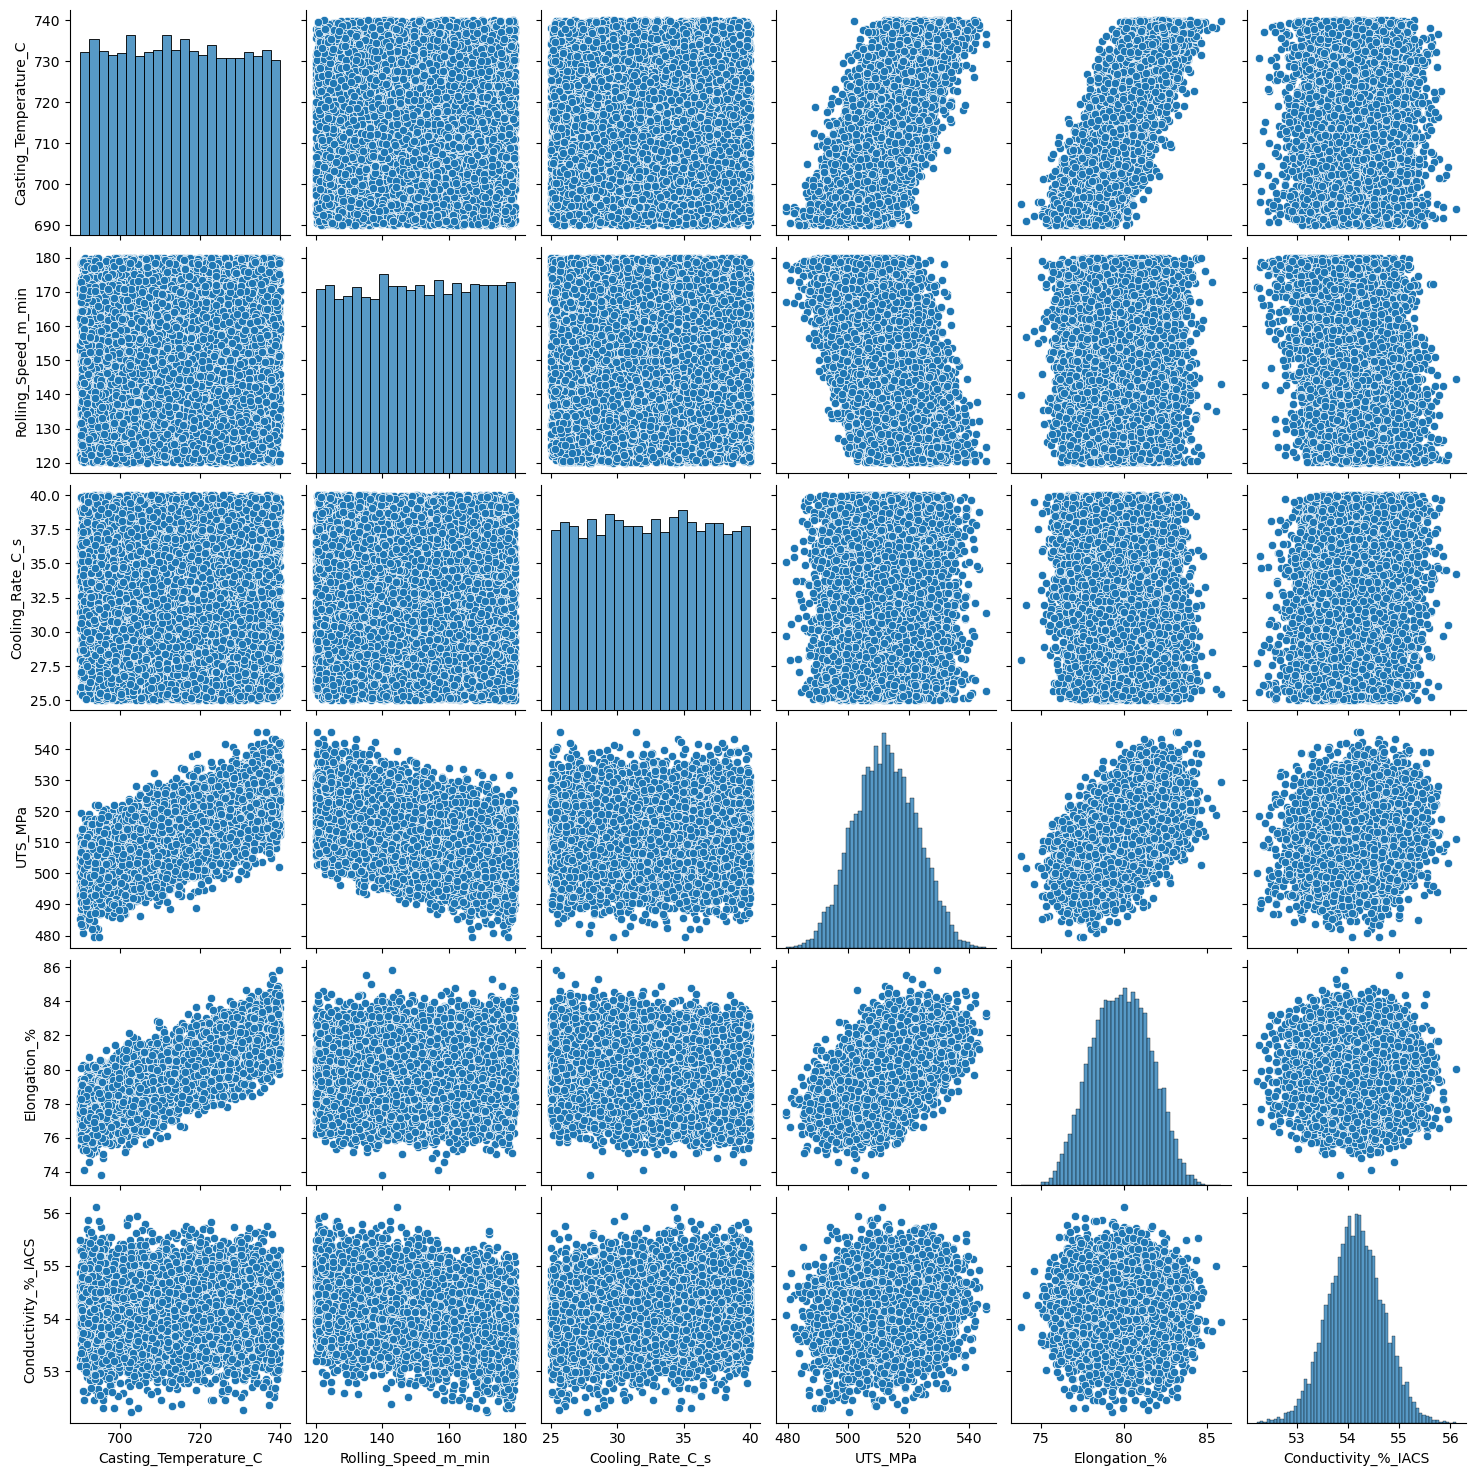

In [12]:
# Pairplot to show relationships
sns.pairplot(df)
plt.show()


In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the input features
X_scaled = scaler.fit_transform(df[['Casting_Temperature_C', 'Rolling_Speed_m_min', 'Cooling_Rate_C_s']])

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['Casting_Temperature_C', 'Rolling_Speed_m_min', 'Cooling_Rate_C_s'])
x=X_scaled_df
x.head()

,Casting_Temperature_C,Rolling_Speed_m_min,Cooling_Rate_C_s
0,-1.187529,0.773606,1.672853
1,-0.049755,-0.460718,0.440551
2,0.129381,-1.105561,1.327623
3,-1.544550,-0.210296,-0.595160
4,-0.553000,-1.169993,-0.324235


In [14]:
y = df[['UTS_MPa', 'Elongation_%', 'Conductivity_%_IACS']]
y.head()

,UTS_MPa,Elongation_%,Conductivity_%_IACS
0,500.711414,78.081272,54.282260
1,511.514986,79.159096,54.244548
2,515.505950,79.558297,54.199773
3,505.424829,76.581255,54.635314
4,515.491479,78.649964,54.109156


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 3) (2000, 3) (8000, 3) (2000, 3)


In [17]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model on training data
linear_regressor.fit(x_train, y_train)

# Make predictions on test data
y_pred = linear_regressor.predict(x_test)


In [18]:
# Calculate R-squared (similar to accuracy in regression)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2}")

R-squared (R²): 0.5218734713999255


In [19]:
import pickle

In [20]:
filename='Al_wire_rod.sav'
pickle.dump(linear_regressor,open(filename,'wb' ))

In [21]:
load_model=pickle.load(open('Al_wire_rod.sav','rb'))